In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
#loading the dataset
df=pd.read_csv('netflix_titles.csv')

In [27]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [29]:
type(df.date_added[0])

str

In [30]:
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [32]:
df.date_added[0]

Timestamp('2021-09-25 00:00:00')

In [33]:
df['month_added']=df.date_added.dt.month_name()

In [34]:
df.month_added.value_counts()

month_added
July         827
December     813
September    770
April        764
October      760
August       755
March        742
January      738
June         728
November     705
May          632
February     563
Name: count, dtype: int64

In [35]:
df.dropna(subset=['release_year','month_added','type','rating','country','duration'],inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7961 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7961 non-null   object        
 1   type          7961 non-null   object        
 2   title         7961 non-null   object        
 3   director      5747 non-null   object        
 4   cast          7290 non-null   object        
 5   country       7961 non-null   object        
 6   date_added    7961 non-null   datetime64[ns]
 7   release_year  7961 non-null   int64         
 8   rating        7961 non-null   object        
 9   duration      7961 non-null   object        
 10  listed_in     7961 non-null   object        
 11  description   7961 non-null   object        
 12  month_added   7961 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(11)
memory usage: 870.7+ KB


In [37]:
df.groupby('rating').size()

rating
G             41
NC-17          3
NR            79
PG           281
PG-13        482
R            788
TV-14       1927
TV-G         190
TV-MA       2929
TV-PG        771
TV-Y         227
TV-Y7        235
TV-Y7-FV       5
UR             3
dtype: int64

In [38]:
df.drop_duplicates(subset='show_id',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7961 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7961 non-null   object        
 1   type          7961 non-null   object        
 2   title         7961 non-null   object        
 3   director      5747 non-null   object        
 4   cast          7290 non-null   object        
 5   country       7961 non-null   object        
 6   date_added    7961 non-null   datetime64[ns]
 7   release_year  7961 non-null   int64         
 8   rating        7961 non-null   object        
 9   duration      7961 non-null   object        
 10  listed_in     7961 non-null   object        
 11  description   7961 non-null   object        
 12  month_added   7961 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(11)
memory usage: 870.7+ KB


In [39]:
type_counts = df['type'].value_counts()
type_counts

type
Movie      5687
TV Show    2274
Name: count, dtype: int64

#VISUALIZATION

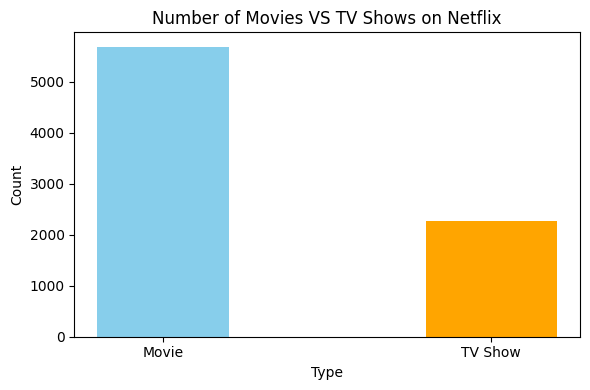

In [40]:
plt.figure(figsize=(6,4))
plt.bar(type_counts.index, type_counts.values, color=['skyblue', 'orange'],width=0.4)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Number of Movies VS TV Shows on Netflix')
plt.tight_layout()
plt.savefig('movies_vs_tv_shows.png',dpi=300,bbox_inches='tight')
plt.show()

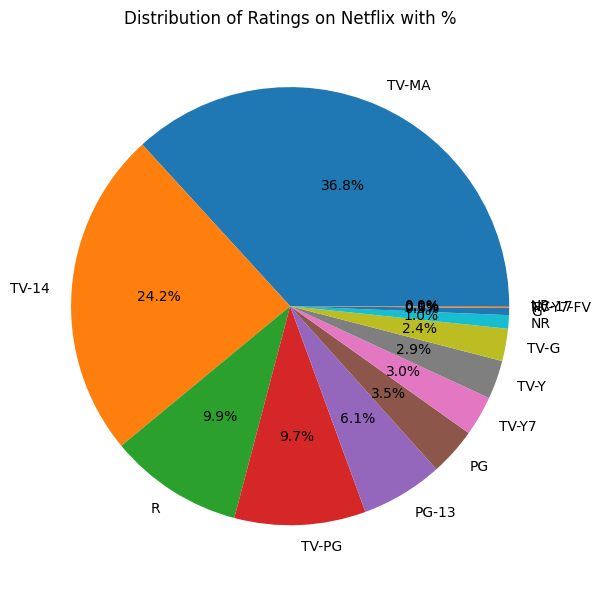

In [41]:
rating_count = df['rating'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(rating_count.values, labels=rating_count.index, autopct='%1.1f%%')
plt.title('Distribution of Ratings on Netflix with %')
plt.tight_layout()
plt.savefig('rating_distribution.png',dpi=300,bbox_inches='tight')
plt.show()

C:\Users\sameer\AppData\Local\Temp\ipykernel_18260\3821502209.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['duration_int'] = movie_df['duration'].str.replace(' min','').astype(int)


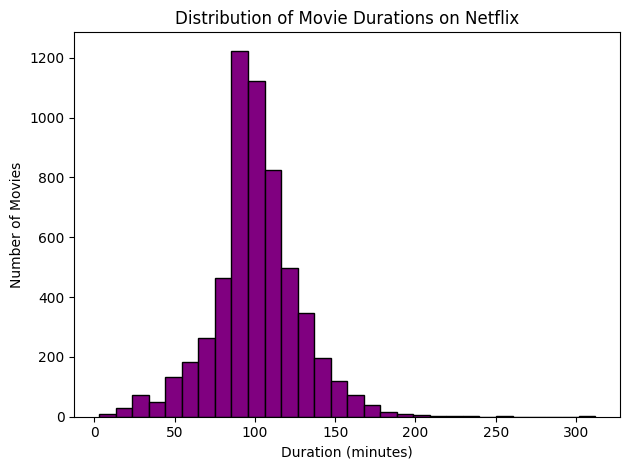

In [94]:
movie_df=df[df['type']=='Movie']
movie_df['duration_int'] = movie_df['duration'].str.replace(' min','').astype(int)
plt.hist(movie_df['duration_int'], bins=30, color='purple', edgecolor='black')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Durations on Netflix')
plt.tight_layout()
plt.savefig('movie_durations.png',dpi=300,bbox_inches='tight')
plt.show()


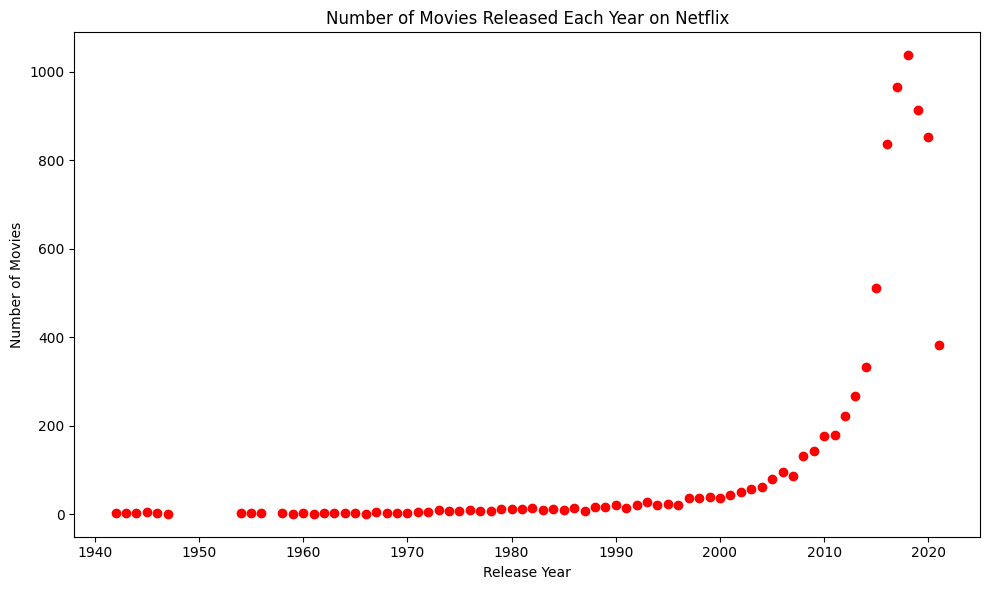

In [43]:
release_year = df['release_year'].value_counts()
plt.figure(figsize=(10,6))
plt.scatter(release_year.index, release_year.values, color='red',marker='o')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released Each Year on Netflix')
plt.tight_layout()
plt.savefig('movies_per_year.png',dpi=300,bbox_inches='tight')
plt.show()

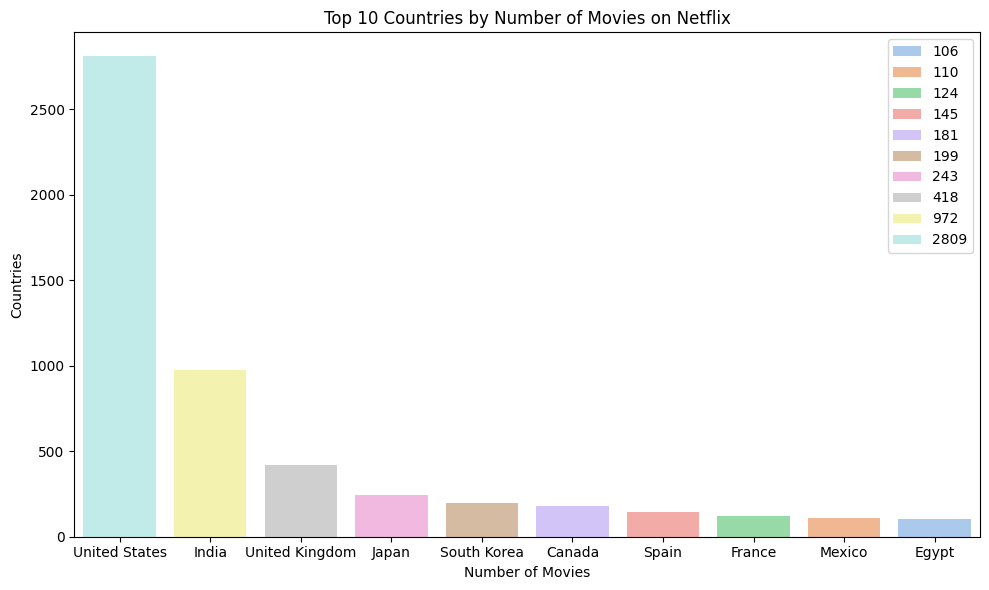

In [74]:
country_count = df['country'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=country_count.index, y=country_count.values, palette="pastel",hue=country_count.values,legend=True)
plt.ylabel('Countries')
plt.xlabel('Number of Movies')
plt.title('Top 10 Countries by Number of Movies on Netflix')
plt.tight_layout()
plt.savefig('top_countries.png',dpi=300,bbox_inches='tight')
plt.show()


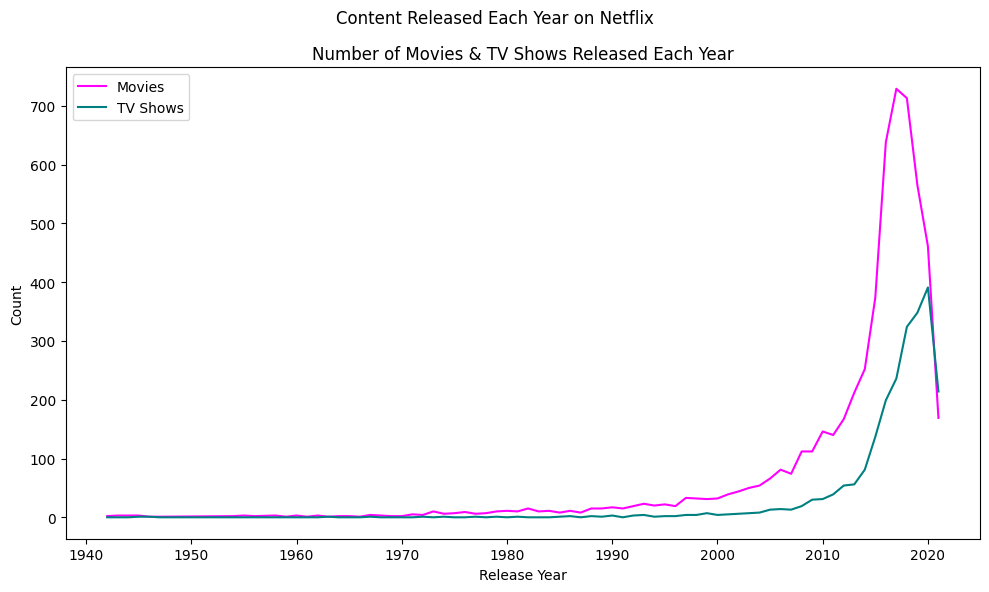

In [45]:
content_by_year = df.groupby(['release_year','type']).size().unstack().fillna(0)

fig, ax = plt.subplots(figsize=(10,6))

# Movies plot
ax.plot(content_by_year.index, content_by_year['Movie'], color='magenta', label='Movies')

# TV Shows plot
ax.plot(content_by_year.index, content_by_year['TV Show'], color='teal', label='TV Shows')

ax.set_title('Number of Movies & TV Shows Released Each Year')
ax.set_xlabel('Release Year')
ax.set_ylabel('Count')
ax.legend()

fig.suptitle('Content Released Each Year on Netflix')
plt.tight_layout()
plt.savefig('content_released_each_year.png', dpi=300, bbox_inches='tight')
plt.show()


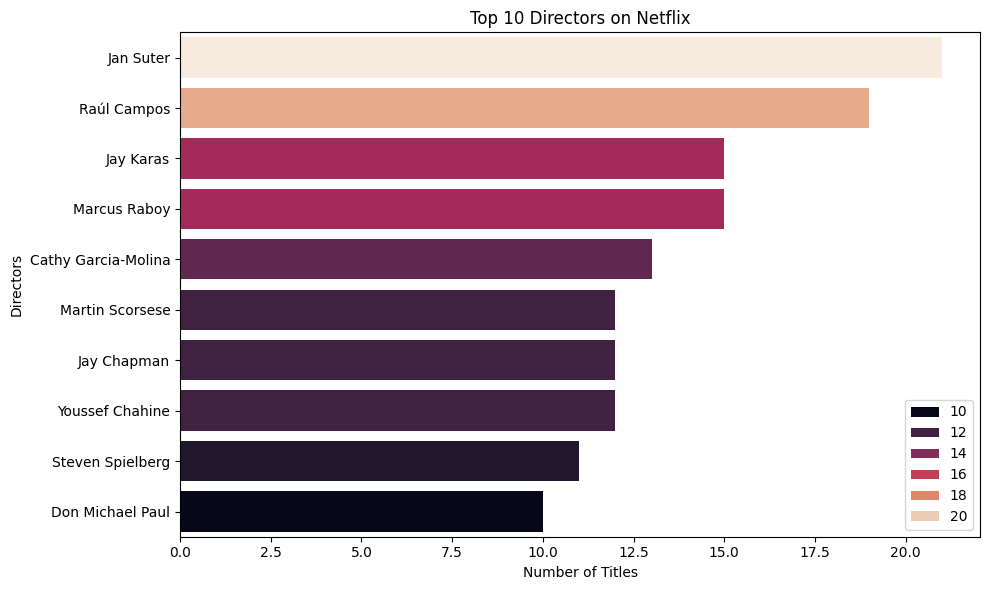

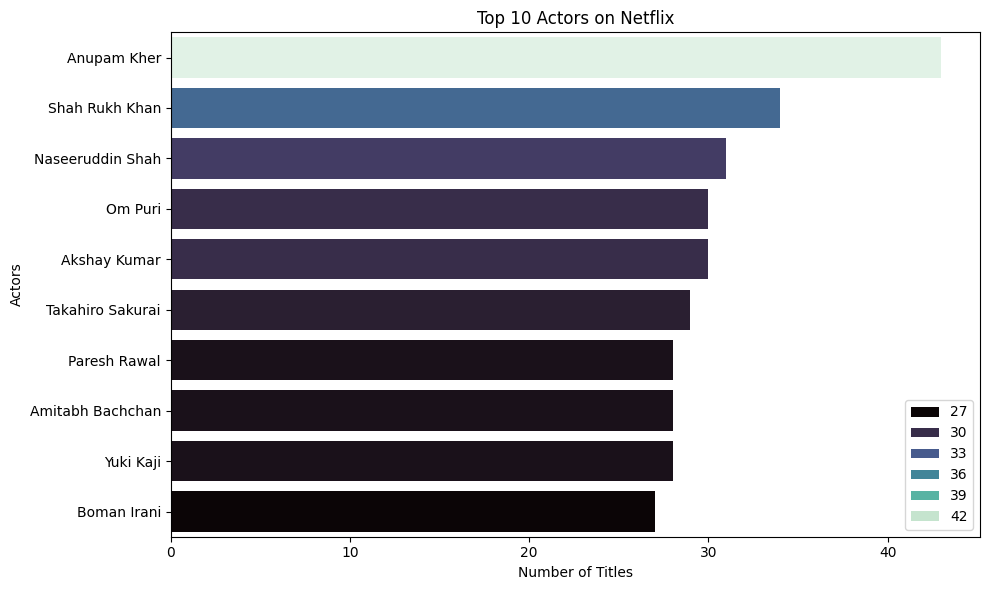

In [93]:
# Top 10 Directors
top_directors = df['director'].dropna().str.split(', ', expand=True).stack().value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette="rocket",hue=top_directors.values,legend=True)
plt.title("Top 10 Directors on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Directors")
plt.savefig('top_directors.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

# Top 10 Actors
top_actors = df['cast'].str.split(', ', expand=True).stack().value_counts().head(10).dropna()

plt.figure(figsize=(10,6))
sns.barplot(x=top_actors.values, y=top_actors.index, palette="mako",hue=top_actors.values,legend=True)
plt.title("Top 10 Actors on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Actors")
plt.savefig('top_actors.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()
